In [1]:
import numpy as np
import pandas as pd
import matplotlib as mql
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from numpy.random import standard_normal as stn
from datetime import datetime
from sklearn import linear_model
import statsmodels.api as sm
import scipy.stats as scs
from scipy.stats import norm
import math
from cvxopt import matrix, solvers
import scipy.optimize as sco
from scipy.fftpack import fft,ifft
from sympy import *
from sklearn.decomposition import PCA
import json
from cvxopt import matrix, solvers

E:\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import pandas as pd
print(pd.__version__)

1.0.3


## Bl model

先随便用几个ETF数据来做,下面是数据处理得到年化log return

In [3]:
a=1

In [4]:
# icode=['AAPL','BA','TSLA','BABA','GS','GOOG','AMZN','TM','F','JPM']
# data=pdr.get_data_yahoo(icode,start='2017-01-01',end='2019-01-01')   # For data
# data_close=data['Adj Close']

# icode2=['^IRX']
# risk_free=pdr.get_data_yahoo(icode2,start='2017-01-01',end='2019-01-01')
# risk_free=risk_free['Adj Close']

energy=pd.read_csv('ENERGY.csv',index_col=0)
material=pd.read_csv('MATERIALS.csv',index_col=0)
industrial=pd.read_csv('INDUSTRIALS.csv',index_col=0)
consumer_discretionary=pd.read_csv("CONSUMER DISCR.csv",index_col=0)
consumer_staples=pd.read_csv('CONSUMER STAPLES.csv',index_col=0)
health_care=pd.read_csv('HEALTH CARE.csv',index_col=0)
financial=pd.read_csv('FINANCIALS.csv',index_col=0)
it=pd.read_csv('INFORMATION TECH.csv',index_col=0)
real_estate=pd.read_csv('REAL ESTATE.csv',index_col=0)
ut=pd.read_csv('UTILITIES.csv',index_col=0)
svc=pd.read_csv('COMM SVC 25-50.csv',index_col=0)








In [5]:
data=pd.merge(energy,material,on='Date',how='left')
data=pd.merge(data,industrial,on='Date',how='left')
data=pd.merge(data,consumer_discretionary,on='Date',how='left')
data=pd.merge(data,consumer_staples,on='Date',how='left')
data=pd.merge(data,health_care,on='Date',how='left')
data=pd.merge(data,financial,on='Date',how='left')
data=pd.merge(data,it,on='Date',how='left')
data=pd.merge(data,svc,on='Date',how='right')
data=pd.merge(data,ut,on='Date',how='left')
data.head()

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
11/30/1998,262.528572,430.640078,489.061696,627.030511,673.914402,663.038024,460.948412,941.351459,1277.928576,501.549209
12/1/1998,255.294784,426.496795,492.100870,629.963326,678.336046,668.762468,460.407430,978.074370,1289.952771,505.125254
12/2/1998,251.244968,423.514039,486.392520,626.169290,677.989331,677.122553,461.648400,974.320010,1286.622797,505.152571
12/3/1998,249.543814,415.947275,477.427863,615.561059,669.705815,659.225084,453.248151,955.366770,1291.679416,503.335765
12/4/1998,253.186141,417.516124,485.756444,624.100846,677.561272,673.047274,463.513232,988.104411,1316.290439,510.873489


In [6]:
icode=data.columns.values

In [7]:
data=data.iloc[4000:,:]
data

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
3/31/2014,1439.147440,1474.814890,1544.869866,1807.220740,1902.381996,1951.875552,787.531517,1701.531213,1587.714945,1352.638331
4/1/2014,1447.340138,1486.489119,1557.524141,1833.141917,1901.453531,1967.924915,791.377595,1725.619914,1604.489108,1344.973763
4/2/2014,1453.037162,1496.426704,1567.236146,1845.126918,1904.547505,1974.681542,792.649458,1725.036875,1607.515438,1342.916988
4/3/2014,1459.633988,1497.174462,1567.353300,1834.376346,1905.417428,1964.644411,791.346491,1711.606611,1604.310834,1346.604535
4/4/2014,1453.006857,1479.206324,1547.005795,1801.198911,1895.350064,1928.669947,782.133887,1671.845129,1586.783756,1352.108457
...,...,...,...,...,...,...,...,...,...,...
4/22/2020,594.745358,1620.318572,1982.409516,3219.279224,2998.538464,3707.082578,1024.544822,4541.457520,2324.130000,2355.349841
4/23/2020,613.589009,1633.454087,2000.532542,3227.153593,2973.829548,3730.146867,1022.668316,4515.091879,2344.051013,2317.042590
4/24/2020,615.409847,1657.043448,2016.643835,3279.781764,3008.084920,3788.658488,1036.832744,4606.805892,2370.876897,2332.509681


In [8]:
returns = np.log(data.shift(-1)/data)
returns=returns.dropna(axis=0,how='all')     #kill nan
Cov=returns.cov()*252
annual_returns=returns*252

In [9]:
returns.shape

(1586, 10)

In [10]:
annual_returns.shape

(1586, 10)

In [11]:
risk_free=0

In [12]:
b1=np.array([2,3,4,5,1,0,0,-1,2,3])
b2=np.array([-2,2,1,6,1,2,0,-3,1,1])

In [13]:
np.random.seed(42)
rr=[0.6,0.2,0.3,0.4,0.5,0,-0.3,-0.2,-0.3,-0.1]
returns_new=np.random.multivariate_normal(rr,Cov,(1000), 'raise')

In [14]:
returns_new=pd.DataFrame(returns_new)

In [15]:
returns_new

,0,1,2,3,4,5,6,7,8,9
0,0.489932,0.050784,0.236885,0.268305,0.498745,-0.108825,-0.296003,-0.284394,-0.542355,-0.065976
1,0.727455,0.288251,0.249477,0.477809,0.634903,0.129795,-0.413666,0.008191,-0.130679,0.007618
2,0.259545,-0.071328,-0.025880,0.131100,0.387108,-0.191059,-0.721103,-0.457526,-0.415047,-0.287439
3,0.993447,0.361687,0.416670,0.431376,0.340496,-0.085996,-0.199503,-0.055673,-0.129710,-0.146153
4,0.481518,0.094515,0.065035,0.335605,0.473847,-0.092284,-0.548636,-0.278165,-0.483224,-0.232882
...,...,...,...,...,...,...,...,...,...,...
995,0.392053,-0.023944,0.142972,0.307881,0.290625,-0.090411,-0.465947,-0.359310,-0.328253,-0.314484
996,0.748788,0.434538,0.478301,0.561463,0.693179,0.127506,-0.034799,-0.093531,-0.014238,0.160858
997,0.924340,0.399279,0.403244,0.489425,0.517432,-0.030639,0.050705,-0.061512,-0.183180,0.085102
998,0.671335,0.331450,0.330431,0.419762,0.498329,0.140226,-0.277291,-0.038741,-0.270182,0.108418


In [16]:
Cov=returns_new.cov()
Cov

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


In [17]:
sigma1=np.dot(np.dot(b1.T,Cov),b1)
sigma2=np.dot(np.dot(b2.T,Cov),b2)

In [18]:
returns=returns_new

### BL model 建立
#### $\mu$

In [19]:
mu=np.mean(returns)
mu

0    0.601069
1    0.197407
2    0.299366
3    0.398076
4    0.496645
5   -0.005210
6   -0.304088
7   -0.200054
8   -0.298550
9   -0.107006
dtype: float64

#### $r_f$

In [20]:
rf=0

#### $\Sigma$

In [21]:
Cov.head()

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053


#### $x_{mkt}$

In [22]:
mktdata=pd.read_csv('Captial.csv',index_col=0)
# mktdata=pd.DataFrame(mktdata,dtype=np.float)

In [23]:
mkt=mktdata.values
mkt=mkt/(np.sum(mkt))

In [24]:
mkt

array([[0.02581884],
       [0.02759065],
       [0.09275018],
       [0.10541214],
       [0.07461352],
       [0.16118301],
       [0.11717999],
       [0.25780988],
       [0.10116106],
       [0.03648073]])

In [25]:
mu

0    0.601069
1    0.197407
2    0.299366
3    0.398076
4    0.496645
5   -0.005210
6   -0.304088
7   -0.200054
8   -0.298550
9   -0.107006
dtype: float64

#### risk aversion L

In [26]:
mkt_return=np.dot(returns,mkt)

L=mkt_return.std()*np.sqrt(252)
L

2.845532567747809

#### Directly $x_{hist}$

In [27]:
#(a)
num=len(icode)
e=np.ones((num,1))

def statistics1(weights):
    
    weights=np.array(weights)
    
    Mark1=np.dot(mu.T,weights)
    Mark2=(1-np.dot(e.T,weights))*rf

    
    
    return [Mark1+Mark2]

def max_Mark(weights):
    
    return -1*statistics1(weights)[0]

cons = (
       {'type':'ineq', 'fun':lambda x: -np.dot(np.dot(x.T,Cov),x)+L**2}
       )
bnds = tuple((0,100) for x in range(num))
hist = sco.minimize(max_Mark, num*[1./num,], method = 'SLSQP', constraints = cons)
print(hist)

     fun: -36.39202592894644
     jac: array([-0.60106945, -0.19740725, -0.299366  , -0.39807606, -0.49664545,
        0.0052104 ,  0.30408812,  0.20005417,  0.29854965,  0.10700655])
 message: 'Optimization terminated successfully.'
    nfev: 540
     nit: 45
    njev: 45
  status: 0
 success: True
       x: array([  4.9770555 ,  -5.03043577,  12.95749144,  22.63081731,
        19.66776203,  -1.4604422 , -17.29275819, -14.39252835,
       -10.20549106,  -5.09820122])


In [28]:
# mu=np.array(mu)

In [29]:
# import cvxpy as cvx
# x = cvx.Variable((10,1))
# # sigma_bar = cvx.Variable((10,10))
# rf = rf
# # x = cp.Variable((10,1))
# e = e.reshape(-1,1)
# I = np.identity(11)


# # sigma_bar.dot(x_mkt)
# Cons = [
#     cvx.quad_form(x, Cov)<=L**2
# ]
# objective = cvx.Maximize(mu.T*x+(1-e.T*x)*rf)
# prob = cvx.Problem(objective, Cons)
# prob.solve(solver='CVXOPT')  # Returns the optimal value.
# print("status:", prob.status)
# print("optimal value", prob.value)
# # print("optimal var", x.value, y.value)
# x.value

In [30]:
x_hist=hist.x/np.sum(hist.x)*100
x_hist

array([  73.69845844,  -74.48889445,  191.86990061,  335.10905174,
        291.23318851,  -21.62570601, -256.06498068, -213.11941422,
       -151.119263  ,  -75.49234095])

In [31]:
#,options={'maxiter': 100000}

#### BL model
$\delta$

In [32]:
delta=1.25

$P$

In [33]:
P=[1,3,6,2,4,-1,3,0,-4,1]
P=np.array(P)

$\hat{\Sigma}$

In [34]:
Cov1=Cov

In [35]:
Cov

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


In [36]:
mkt

array([[0.02581884],
       [0.02759065],
       [0.09275018],
       [0.10541214],
       [0.07461352],
       [0.16118301],
       [0.11717999],
       [0.25780988],
       [0.10116106],
       [0.03648073]])

$\hat{r}$

In [37]:
r_hat=rf*e+2*delta*np.dot(Cov,mkt)

In [38]:
r_hat

array([[0.0933067 ],
       [0.08088774],
       [0.08294562],
       [0.07932655],
       [0.05485226],
       [0.07422684],
       [0.08930509],
       [0.09249859],
       [0.07289621],
       [0.05398521]])

$q$

In [39]:
q=np.dot(P.T,r_hat)
q

array([1.16779458])

In [40]:
q=np.dot(P.T,r_hat)
q=q[0]
q=np.array([[q-1]])

In [41]:
q

array([[0.16779458]])

$\Omega$

In [42]:
mm=1
r0=1/24
r1=0.02*r0
rr=[r1]

In [43]:
Cov

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


In [44]:
A1=Cov*r0
A2=np.zeros((num,mm))
A3=np.zeros((mm,num))
A4=np.diag(rr)

Omega1=np.concatenate((A1,A2),axis=1)
Omega2=np.concatenate((A3,A4),axis=1)
Omega=np.concatenate((Omega1,Omega2),axis=0)
# A1=np.insert(Cov*r0,-1)

In [45]:
Omega

array([[0.00332749, 0.00186015, 0.00178255, 0.00151836, 0.0009121 ,
        0.00127046, 0.00188502, 0.00164523, 0.00140009, 0.00090407,
        0.        ],
       [0.00186015, 0.00169934, 0.00153593, 0.00133283, 0.00088949,
        0.00118513, 0.00157436, 0.00146699, 0.00117478, 0.00085911,
        0.        ],
       [0.00178255, 0.00153593, 0.00162532, 0.00137332, 0.00091486,
        0.00121015, 0.00162511, 0.00151429, 0.00120412, 0.00089244,
        0.        ],
       [0.00151836, 0.00133283, 0.00137332, 0.00147071, 0.00084873,
        0.00115954, 0.00145754, 0.00153256, 0.00118262, 0.00076652,
        0.        ],
       [0.0009121 , 0.00088949, 0.00091486, 0.00084873, 0.00094939,
        0.00085487, 0.00096819, 0.00097605, 0.00085091, 0.00087719,
        0.        ],
       [0.00127046, 0.00118513, 0.00121015, 0.00115954, 0.00085487,
        0.00144647, 0.00129957, 0.00136395, 0.0010476 , 0.00083088,
        0.        ],
       [0.00188502, 0.00157436, 0.00162511, 0.00145754, 0.

$\Sigma^{BL}$

In [46]:
B1=np.eye(num,num)
P=P.reshape(1,num)
B=np.concatenate((B1,P),axis=0)

In [47]:
B

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  3.,  6.,  2.,  4., -1.,  3.,  0., -4.,  1.]])

In [48]:
np.linalg.inv(Omega)

array([[ 8.50574584e+02, -5.99776631e+02, -3.21146757e+02,
         4.62176624e+01,  2.36318232e+02,  1.12790587e+02,
        -2.12707759e+02,  2.38964987e+01, -1.52482219e+02,
         4.39042120e+00,  0.00000000e+00],
       [-5.99776631e+02,  4.58702269e+03, -2.97119061e+03,
        -2.87294469e+02, -2.52473775e+02, -2.42116210e+02,
        -1.64534781e+02, -1.63723774e+01,  3.47454989e+01,
         2.44088918e+01,  0.00000000e+00],
       [-3.21146757e+02, -2.97119061e+03,  7.57445228e+03,
        -1.37630961e+03, -3.83708643e+02, -1.71582822e+02,
        -1.81478676e+03, -4.25287059e+02,  3.60777075e+01,
        -1.97556806e+02,  0.00000000e+00],
       [ 4.62176624e+01, -2.87294469e+02, -1.37630961e+03,
         5.63468586e+03, -2.65767292e+02, -2.37310676e+02,
        -6.10859083e+02, -2.05363407e+03, -7.27931137e+02,
         4.11165076e+02,  0.00000000e+00],
       [ 2.36318232e+02, -2.52473775e+02, -3.83708643e+02,
        -2.65767292e+02,  3.89700742e+03, -5.76011080e+02,
  

In [49]:
Cov1

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


In [50]:
Cov2=np.linalg.inv(np.dot(np.dot(B.T,np.linalg.inv(Omega)),B))
Cov2

array([[ 1.26521876e-03,  1.06009719e-04,  1.29991617e-05,
        -1.72042372e-05, -2.06344466e-04, -7.26537586e-05,
         1.66110925e-05, -3.39760670e-05,  1.62551819e-04,
        -2.07578421e-04],
       [ 1.06009719e-04,  2.07301614e-04,  3.07782298e-05,
         2.67040928e-05, -6.18394207e-05,  4.27036811e-05,
        -1.48813066e-05,  3.86851670e-05,  1.22144289e-04,
        -8.64368995e-05],
       [ 1.29991617e-05,  3.07782298e-05,  1.06936806e-04,
         5.57110630e-05, -4.48262300e-05,  5.76794935e-05,
         2.19064685e-05,  7.34270872e-05,  1.42231709e-04,
        -6.14175422e-05],
       [-1.72042372e-05,  2.67040928e-05,  5.57110630e-05,
         3.27323729e-04,  1.59382303e-05,  1.59457822e-04,
         6.63199124e-05,  2.82227310e-04,  2.61149207e-04,
        -6.12187715e-05],
       [-2.06344466e-04, -6.18394207e-05, -4.48262300e-05,
         1.59382303e-05,  3.42826742e-04,  1.26451692e-04,
        -4.51168036e-05,  6.53586100e-05,  1.79746088e-04,
         2.

In [51]:
Cov_BL=Cov1+Cov2
Cov_BL

,0,1,2,3,4,5,6,7,8,9
0,0.081125,0.044750,0.042794,0.036424,0.021684,0.030418,0.045257,0.039452,0.033765,0.021490
1,0.044750,0.040991,0.036893,0.032015,0.021286,0.028486,0.037770,0.035246,0.028317,0.020532
2,0.042794,0.036893,0.039115,0.033015,0.021912,0.029101,0.039025,0.036416,0.029041,0.021357
3,0.036424,0.032015,0.033015,0.035624,0.020385,0.027988,0.035047,0.037064,0.028644,0.018335
4,0.021684,0.021286,0.021912,0.020385,0.023128,0.020643,0.023191,0.023491,0.020601,0.021327
5,0.030418,0.028486,0.029101,0.027988,0.020643,0.035287,0.031273,0.033005,0.025384,0.020048
6,0.045257,0.037770,0.039025,0.035047,0.023191,0.031273,0.048015,0.038282,0.031541,0.022709
7,0.039452,0.035246,0.036416,0.037064,0.023491,0.033005,0.038282,0.048137,0.031985,0.022011
8,0.033765,0.028317,0.029041,0.028644,0.020601,0.025384,0.031541,0.031985,0.037111,0.020707
9,0.021490,0.020532,0.021357,0.018335,0.021327,0.020048,0.022709,0.022011,0.020707,0.037635


In [52]:
r_hat.shape

(10, 1)

$\mu^{BL}$

In [53]:
C3=np.concatenate((r_hat,q),axis=0)
C3

array([[0.0933067 ],
       [0.08088774],
       [0.08294562],
       [0.07932655],
       [0.05485226],
       [0.07422684],
       [0.08930509],
       [0.09249859],
       [0.07289621],
       [0.05398521],
       [0.16779458]])

In [54]:
C1=np.dot(Cov2,B.T)
C2=np.dot(np.linalg.inv(Omega),C3)
mu_BL=np.dot(C1,C2)

In [55]:
mu_BL

array([[0.01391724],
       [0.0133604 ],
       [0.01482471],
       [0.02021322],
       [0.0117967 ],
       [0.02252232],
       [0.0173786 ],
       [0.02785565],
       [0.02525575],
       [0.01119105]])

In [56]:
mu=np.array(mu)
mu

array([ 0.60106923,  0.19740684,  0.29936594,  0.3980757 ,  0.49664529,
       -0.00521037, -0.30408813, -0.20005411, -0.29854962, -0.1070064 ])

In [57]:
Cov_BL

,0,1,2,3,4,5,6,7,8,9
0,0.081125,0.044750,0.042794,0.036424,0.021684,0.030418,0.045257,0.039452,0.033765,0.021490
1,0.044750,0.040991,0.036893,0.032015,0.021286,0.028486,0.037770,0.035246,0.028317,0.020532
2,0.042794,0.036893,0.039115,0.033015,0.021912,0.029101,0.039025,0.036416,0.029041,0.021357
3,0.036424,0.032015,0.033015,0.035624,0.020385,0.027988,0.035047,0.037064,0.028644,0.018335
4,0.021684,0.021286,0.021912,0.020385,0.023128,0.020643,0.023191,0.023491,0.020601,0.021327
5,0.030418,0.028486,0.029101,0.027988,0.020643,0.035287,0.031273,0.033005,0.025384,0.020048
6,0.045257,0.037770,0.039025,0.035047,0.023191,0.031273,0.048015,0.038282,0.031541,0.022709
7,0.039452,0.035246,0.036416,0.037064,0.023491,0.033005,0.038282,0.048137,0.031985,0.022011
8,0.033765,0.028317,0.029041,0.028644,0.020601,0.025384,0.031541,0.031985,0.037111,0.020707
9,0.021490,0.020532,0.021357,0.018335,0.021327,0.020048,0.022709,0.022011,0.020707,0.037635


In [58]:
Cov

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


#### BL result

In [59]:
num=len(icode)
e=np.zeros(num)+1

def statistics2(weights):
    
    weights=np.array(weights)
    
    Mark1=np.dot(mu_BL.T,weights)
    Mark2=(1-np.dot(e.T,weights))*rf

    
    
    return [Mark1+Mark2]

def max_Mark1(weights):
    
    return -1/100*statistics2(weights)[0]

cons = (
       {'type':'ineq', 'fun':lambda x: -np.dot(np.dot(x.T,Cov_BL),x)+L**2}
       )
bnds = tuple((0,20) for x in range(num))
bl = sco.minimize(max_Mark1, num*[1./num,], method = 'SLSQP',  constraints = cons)
print(bl)

     fun: -0.00017831561859312102
     jac: array([-0.00013917, -0.0001336 , -0.00014825, -0.00020213, -0.00011797,
       -0.00022522, -0.00017379, -0.00027856, -0.00025256, -0.00011191])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])


In [60]:
x_bl=bl.x/np.sum(bl.x)*100
x_bl

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [61]:
x_mkt=mkt/np.sum(mkt)*100
x_mkt=np.array(x_mkt)
x_mkt

array([[ 2.58188418],
       [ 2.75906463],
       [ 9.27501837],
       [10.54121408],
       [ 7.46135222],
       [16.11830092],
       [11.71799928],
       [25.78098764],
       [10.11610578],
       [ 3.6480729 ]])

## MVIO model

In [62]:
delta

1.25

$\bar{\Sigma}$

In [63]:
C_new=2*delta*Cov

In [64]:
mu_BL

array([[0.01391724],
       [0.0133604 ],
       [0.01482471],
       [0.02021322],
       [0.0117967 ],
       [0.02252232],
       [0.0173786 ],
       [0.02785565],
       [0.02525575],
       [0.01119105]])

In [65]:
mkt

array([[0.02581884],
       [0.02759065],
       [0.09275018],
       [0.10541214],
       [0.07461352],
       [0.16118301],
       [0.11717999],
       [0.25780988],
       [0.10116106],
       [0.03648073]])

In [66]:
##### special case with sigma = 0.5 * delta * sigma : BL
import cvxpy as cvx
mu_io = cvx.Variable((10,1))
# sigma_bar = cvx.Variable((10,10))
t = cvx.Variable((1,1))
u = cvx.Variable((11,1))
rf = rf
Omega = Omega 
x_mkt = np.array(mkt).reshape(-1,1)
# x = cp.Variable((10,1))
e = e.reshape(-1,1)
I = np.identity(11)
q = q.reshape(-1,1)


tmp = 1.25*2*np.array(Cov).dot(np.array(x_mkt).reshape(-1,1))
# sigma_bar.dot(x_mkt)
Cons = [
    u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - tmp, \
                                                          P@mu_io - q]) == 0,
    cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I]) ]) >> 0,
#     sigma_bar >= 0
]
objective = cvx.Minimize(t)
prob = cvx.Problem(objective, Cons)
prob.solve(solver='CVXOPT')  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
# print("optimal var", x.value, y.value)

status: optimal
optimal value 0.34648950500104525


In [67]:
mu_io.value

array([[ 0.01810928],
       [ 0.01234254],
       [ 0.01413144],
       [ 0.01323832],
       [-0.00087175],
       [ 0.01081921],
       [ 0.01812143],
       [ 0.02223736],
       [ 0.00902767],
       [-0.00226625]])

In [68]:
Cov

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


In [69]:
mu_io.value

array([[ 0.01810928],
       [ 0.01234254],
       [ 0.01413144],
       [ 0.01323832],
       [-0.00087175],
       [ 0.01081921],
       [ 0.01812143],
       [ 0.02223736],
       [ 0.00902767],
       [-0.00226625]])

In [70]:
from cvxpy.reductions.solvers.defines import INSTALLED_SOLVERS
INSTALLED_SOLVERS

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']

In [71]:
q

array([[0.16779458]])

In [72]:
np.savetxt('Omega.csv', Omega, delimiter = ',')
np.savetxt('xmkt.csv', x_mkt, delimiter = ',')
np.savetxt('Cov.csv', Cov, delimiter = ',')

In [73]:
# ##### general case with sigma as vriable.
# import cvxpy as cvx
# mu_io = cvx.Variable((10,1))
# sigma_bar = cvx.Variable((10,10))
# t = cvx.Variable((1,1))
# u = cvx.Variable((11,1))
# rf = rf
# Omega = Omega 
# x_mkt = np.array(mkt).reshape(-1,1)
# e = e.reshape(-1,1)
# I = np.identity(11)
# q = q.reshape(-1,1)

# # sigma_bar.dot(x_mkt)
# Cons = [
#     u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - sigma_bar@x_mkt, \
#                                                           P @ mu_io - q]) == 0,
#     cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I])]) >> 0,
#     sigma_bar >= 0
# ]

# objective = cvx.Minimize(t)
# prob = cvx.Problem(objective, Cons)
# prob.solve(solver='CVXOPT')  # Returns the optimal value.
# print("status:", prob.status)
# print("optimal value", prob.value)
# # print("optimal var", x.value, y.value)

In [74]:
q

array([[0.16779458]])

In [75]:
print(cvx.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [76]:
mu_io.value

array([[ 0.01810928],
       [ 0.01234254],
       [ 0.01413144],
       [ 0.01323832],
       [-0.00087175],
       [ 0.01081921],
       [ 0.01812143],
       [ 0.02223736],
       [ 0.00902767],
       [-0.00226625]])

In [77]:
q

array([[0.16779458]])

In [78]:
C_new

,0,1,2,3,4,5,6,7,8,9
0,0.199650,0.111609,0.106953,0.091102,0.054726,0.076227,0.113101,0.098714,0.084006,0.054244
1,0.111609,0.101960,0.092156,0.079970,0.053369,0.071108,0.094461,0.088020,0.070487,0.051547
2,0.106953,0.092156,0.097519,0.082399,0.054892,0.072609,0.097507,0.090857,0.072247,0.053547
3,0.091102,0.079970,0.082399,0.088242,0.050924,0.069572,0.087452,0.091954,0.070957,0.045991
4,0.054726,0.053369,0.054892,0.050924,0.056964,0.051292,0.058091,0.058563,0.051054,0.052631
5,0.076227,0.071108,0.072609,0.069572,0.051292,0.086788,0.077974,0.081837,0.062856,0.049853
6,0.113101,0.094461,0.097507,0.087452,0.058091,0.077974,0.119299,0.095528,0.078388,0.056920
7,0.098714,0.088020,0.090857,0.091954,0.058563,0.081837,0.095528,0.118810,0.079182,0.054998
8,0.084006,0.070487,0.072247,0.070957,0.051054,0.062856,0.078388,0.079182,0.090848,0.051298
9,0.054244,0.051547,0.053547,0.045991,0.052631,0.049853,0.056920,0.054998,0.051298,0.091761


In [79]:
alpha=0.87
ee=10**(-8)
value,vector=np.linalg.eig(C_new)

In [80]:
value

array([0.789304  , 0.09141169, 0.05554288, 0.02827846, 0.02429298,
       0.01980068, 0.01564572, 0.01289508, 0.00863909, 0.00603108])

In [81]:
vector

array([[ 4.16621700e-01,  7.53630431e-01, -3.82179754e-01,
        -1.45464124e-01,  2.67846454e-01,  2.62370746e-02,
        -8.94673878e-02, -1.00538251e-01,  2.64277168e-02,
        -2.33944824e-03],
       [ 3.34324779e-01,  9.49528241e-02,  4.31025166e-02,
         3.00309870e-01, -2.10985052e-01, -3.18145592e-02,
         6.44792384e-01,  2.91855252e-01, -1.99158321e-01,
         4.48374236e-01],
       [ 3.35731528e-01,  1.86529551e-02,  8.72916225e-02,
         2.46007677e-01, -2.26672132e-01, -6.77857570e-02,
         1.97088178e-01,  8.83741563e-02,  8.53642448e-02,
        -8.41950619e-01],
       [ 3.09250672e-01, -7.37044808e-02,  2.82945881e-01,
        -6.09466556e-02,  1.25696505e-02, -2.63502422e-01,
        -1.95053108e-02, -6.30012572e-02,  8.31251184e-01,
         2.24140884e-01],
       [ 2.14008187e-01, -2.94572953e-01, -1.79069837e-01,
        -6.63486619e-04,  1.86467707e-02,  1.16194746e-01,
         3.05074913e-01, -8.50268408e-01, -7.11280717e-02,
         2.

In [82]:
vector[:,0]

array([0.4166217 , 0.33432478, 0.33573153, 0.30925067, 0.21400819,
       0.28173337, 0.3598751 , 0.34921603, 0.28694623, 0.21755092])

In [83]:
vector[0]

array([ 0.4166217 ,  0.75363043, -0.38217975, -0.14546412,  0.26784645,
        0.02623707, -0.08946739, -0.10053825,  0.02642772, -0.00233945])

In [84]:
print(cvx.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [85]:
value[0:3]

array([0.789304  , 0.09141169, 0.05554288])

In [86]:
##### general case with sigma as vriable.
alpha=0.87
ee=10**(-8)
value,vector=np.linalg.eig(C_new)


import cvxpy as cvx
if a==1:
    mu_io = cvx.Variable((10,1))
    sigma_bar = cvx.Variable((10,10))
    t = cvx.Variable((1,1))
    u = cvx.Variable((11,1))
    rf = rf
    Omega = Omega 
    x_mkt = np.array(mkt).reshape(-1,1)
    e = e.reshape(-1,1)
    I = np.identity(11)
    q = q.reshape(-1,1)

    # sigma_bar.dot(x_mkt)
    Cons = [
        u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - sigma_bar@x_mkt, \
                                                              P @ mu_io - q]) == 0,
        cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I])]) >> 0,
        value[0:3].sum()>=alpha*cvx.trace(sigma_bar),
        cvx.norm(-sigma_bar@vector[:,0]+value[0]*vector[:,0],p=2)<=ee,
        cvx.norm(-sigma_bar@vector[:,1]+value[1]*vector[:,1],p=2)<=ee,
        cvx.norm(-sigma_bar@vector[:,2]+value[2]*vector[:,2],p=2)<=ee,
        sigma_bar >= 0
    ]

    objective = cvx.Minimize(t)
    prob = cvx.Problem(objective, Cons)
    prob.solve(solver='CVXOPT')  # Returns the optimal value.
    print("status:", prob.status)
    print("optimal value", prob.value)
    # print("optimal var", x.value, y.value)
    
else:
    
    mu_io = cvx.Variable((10,1))
    sigma_bar = cvx.Variable((10,10))
    t = cvx.Variable((1,1))
    u = cvx.Variable((11,1))
    rf = rf
    Omega = Omega 
    x_mkt = np.array(mkt).reshape(-1,1)
    e = e.reshape(-1,1)
    I = np.identity(11)
    q = q.reshape(-1,1)

    # sigma_bar.dot(x_mkt)
    Cons = [
        u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - sigma_bar@x_mkt, \
                                                              P @ mu_io - q]) == 0,
        cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I])]) >> 0,
        cvx.norm(np.dot(np.dot(b1.T,sigma_bar),b1)-sigma1*10.,p=2)<=ee,
#         cvx.norm(np.dot(np.dot(b2.T,sigma_bar),b2)-sigma2,p=2)<=ee,
#         cvx.norm(-sigma_bar@vector[:,0]+value[0]*vector[:,0],p=2)<=ee,
#         cvx.norm(-sigma_bar@vector[:,1]+value[1]*vector[:,1],p=2)<=ee,
#         cvx.norm(-sigma_bar@vector[:,2]+value[2]*vector[:,2],p=2)<=ee,
        sigma_bar >= 0
    ]

    objective = cvx.Minimize(t)
    prob = cvx.Problem(objective, Cons)
    prob.solve(solver='CVXOPT')  # Returns the optimal value.
    print("status:", prob.status)
    print("optimal value", prob.value)
    # print("optimal var", x.value, y.value)
    

status: optimal
optimal value -2.364064655812782e-10


In [87]:
sigma1

10.901391751495465

In [88]:
mu_io.value

array([[0.03468979],
       [0.03576249],
       [0.03685929],
       [0.03982528],
       [0.0294699 ],
       [0.10632043],
       [0.04084955],
       [0.08544029],
       [0.11029931],
       [0.03210046]])

In [89]:
mu_BL

array([[0.01391724],
       [0.0133604 ],
       [0.01482471],
       [0.02021322],
       [0.0117967 ],
       [0.02252232],
       [0.0173786 ],
       [0.02785565],
       [0.02525575],
       [0.01119105]])

In [90]:
mu

array([ 0.60106923,  0.19740684,  0.29936594,  0.3980757 ,  0.49664529,
       -0.00521037, -0.30408813, -0.20005411, -0.29854962, -0.1070064 ])

In [91]:
sigma_bar.value

array([[4.10606036e-02, 8.22028037e-01, 1.41220991e-02, 1.22384157e-02,
        1.85708129e-02, 6.92654736e-03, 1.05500933e-02, 4.10723390e-03,
        1.25054373e-02, 6.26931857e-02],
       [2.31238815e-03, 6.13442570e-01, 7.78682248e-03, 6.83638276e-02,
        6.58657364e-02, 7.63101791e-03, 5.62511988e-03, 2.68235782e-03,
        1.62196419e-02, 4.69529328e-02],
       [6.89341265e-04, 6.09930539e-01, 3.67666868e-03, 7.61106505e-02,
        1.12794763e-01, 3.71875716e-03, 2.67496179e-03, 1.22367285e-03,
        7.93826317e-03, 3.29392883e-02],
       [2.29507817e-03, 4.99970650e-01, 1.13085957e-02, 1.00937854e-01,
        8.79639452e-02, 1.23015428e-02, 8.20961957e-03, 4.03351284e-03,
        2.51389320e-02, 3.26590129e-02],
       [1.09557365e-03, 3.07846320e-01, 5.55296427e-03, 9.57956035e-02,
        7.02287163e-02, 5.68264374e-03, 4.02971631e-03, 1.91869235e-03,
        1.21838499e-02, 5.42604537e-02],
       [1.27990907e-01, 6.64916959e-03, 1.02593616e-02, 8.10577312e-03,
   

In [92]:
Cov

,0,1,2,3,4,5,6,7,8,9
0,0.079860,0.044643,0.042781,0.036441,0.021890,0.030491,0.045241,0.039486,0.033602,0.021698
1,0.044643,0.040784,0.036862,0.031988,0.021348,0.028443,0.037785,0.035208,0.028195,0.020619
2,0.042781,0.036862,0.039008,0.032960,0.021957,0.029044,0.039003,0.036343,0.028899,0.021419
3,0.036441,0.031988,0.032960,0.035297,0.020369,0.027829,0.034981,0.036782,0.028383,0.018396
4,0.021890,0.021348,0.021957,0.020369,0.022785,0.020517,0.023236,0.023425,0.020422,0.021053
5,0.030491,0.028443,0.029044,0.027829,0.020517,0.034715,0.031190,0.032735,0.025142,0.019941
6,0.045241,0.037785,0.039003,0.034981,0.023236,0.031190,0.047720,0.038211,0.031355,0.022768
7,0.039486,0.035208,0.036343,0.036782,0.023425,0.032735,0.038211,0.047524,0.031673,0.021999
8,0.033602,0.028195,0.028899,0.028383,0.020422,0.025142,0.031355,0.031673,0.036339,0.020519
9,0.021698,0.020619,0.021419,0.018396,0.021053,0.019941,0.022768,0.021999,0.020519,0.036704


In [93]:
num=len(icode)
e=np.zeros(num)+1

def statistics2(weights):
    
    weights=np.array(weights)
    
    Mark1=np.dot(mu_io.value.T,weights)
    Mark2=(1-np.dot(e.T,weights))*rf

    
    
    return [Mark1+Mark2]

def max_Mark1(weights):
    
    return -1/100*statistics2(weights)[0]

cons = (
       {'type':'ineq', 'fun':lambda x: -np.dot(np.dot(x.T,sigma_bar.value/2.5),x)+L**2}
       )
bnds = tuple((0,1) for x in range(num))
mvio = sco.minimize(max_Mark1, num*[1./num,], method = 'SLSQP',  constraints = cons)
print(mvio)

# x_mvio=np.dot(np.linalg.inv(2*delta*sigma_bar.value),(mu_io.value-rf*e))

# x_mvio.shape

     fun: -184649.20094175945
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 397
     nit: 33
    njev: 33
  status: 0
 success: True
       x: array([  1842978.01050621, -53970875.17957025,  27733964.20973071,
        16725347.09785099,   7404407.99156907,  82653663.12916361,
        30934093.58323393, -13746186.52237689,  87719750.9174189 ,
        -3981198.83076026])


In [94]:
# import cvxpy as cvx
# x = cvx.Variable((10,1))
# # sigma_bar = cvx.Variable((10,10))
# rf = rf
# # x = cp.Variable((10,1))
# e = e.reshape(-1,1)
# I = np.identity(11)


# # sigma_bar.dot(x_mkt)
# Cons = [
# #     cvx.quad_form(x, sigma_bar.value)<=L**2
#     x.T@sigma_bar.value@x<=L**2
# ]
# objective = cvx.Maximize(mu_io.value.T*x+(1-e.T*x)*rf)
# prob = cvx.Problem(objective, Cons)
# prob.solve(solver='CVXOPT')  # Returns the optimal value.
# print("status:", prob.status)
# print("optimal value", prob.value)
# # print("optimal var", x.value, y.value)
# x.value

In [95]:
x_mvio=mvio.x/np.sum(mvio.x)*100
# x_mvio=x_mvio/np.sum(x_mvio)*100

In [96]:
returns

,0,1,2,3,4,5,6,7,8,9
0,0.489932,0.050784,0.236885,0.268305,0.498745,-0.108825,-0.296003,-0.284394,-0.542355,-0.065976
1,0.727455,0.288251,0.249477,0.477809,0.634903,0.129795,-0.413666,0.008191,-0.130679,0.007618
2,0.259545,-0.071328,-0.025880,0.131100,0.387108,-0.191059,-0.721103,-0.457526,-0.415047,-0.287439
3,0.993447,0.361687,0.416670,0.431376,0.340496,-0.085996,-0.199503,-0.055673,-0.129710,-0.146153
4,0.481518,0.094515,0.065035,0.335605,0.473847,-0.092284,-0.548636,-0.278165,-0.483224,-0.232882
...,...,...,...,...,...,...,...,...,...,...
995,0.392053,-0.023944,0.142972,0.307881,0.290625,-0.090411,-0.465947,-0.359310,-0.328253,-0.314484
996,0.748788,0.434538,0.478301,0.561463,0.693179,0.127506,-0.034799,-0.093531,-0.014238,0.160858
997,0.924340,0.399279,0.403244,0.489425,0.517432,-0.030639,0.050705,-0.061512,-0.183180,0.085102
998,0.671335,0.331450,0.330431,0.419762,0.498329,0.140226,-0.277291,-0.038741,-0.270182,0.108418


In [97]:
x_mvio

array([  1.00535609, -29.44145167,  15.12905181,   9.12378198,
         4.0391511 ,  45.0880928 ,  16.8747425 ,  -7.49863116,
        47.85167553,  -2.17176899])

In [98]:
x_mkt=mkt*100

In [99]:
x_mvio,x_mkt,x_bl

(array([  1.00535609, -29.44145167,  15.12905181,   9.12378198,
          4.0391511 ,  45.0880928 ,  16.8747425 ,  -7.49863116,
         47.85167553,  -2.17176899]),
 array([[ 2.58188418],
        [ 2.75906463],
        [ 9.27501837],
        [10.54121408],
        [ 7.46135222],
        [16.11830092],
        [11.71799928],
        [25.78098764],
        [10.11610578],
        [ 3.6480729 ]]),
 array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]))

In [100]:
mvio_return=np.dot(returns,x_mvio)
mkt_return=np.dot(returns,x_mkt)
bl_return=np.dot(returns,x_bl)

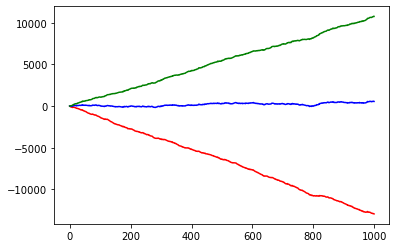

In [101]:
plt.plot(np.cumsum(mvio_return), color='red')
plt.plot(np.cumsum(mkt_return), color='blue')
plt.plot(np.cumsum(bl_return), color='green')

In [102]:
np.savetxt('new.csv', C_new, delimiter = ',')

In [103]:
result = pd.DataFrame([[0,0,0] for i in range(3)], columns = ['mean','std','SR'], index=['mkt','BL','MVIO'])

result.iloc[2,0]=mvio_return.mean()
result.iloc[2,1]=mvio_return.std()
result.iloc[2,2]=mvio_return.mean()/mvio_return.std()

In [104]:
result.iloc[0,0]=mkt_return.mean()
result.iloc[0,1]=mkt_return.std()
result.iloc[0,2]=mkt_return.mean()/mkt_return.std()

In [105]:
result.iloc[1,0]=bl_return.mean()
result.iloc[1,1]=bl_return.std()
result.iloc[1,2]=bl_return.mean()/bl_return.std()

In [106]:
result

,mean,std,SR
mkt,0.559615,17.925170,0.031219
BL,10.776544,17.470603,0.616839
MVIO,-12.960460,17.660218,-0.733879
